# Optimizer LCD sur le jeu de données FashionMnist

In [1]:
# Quelques packages à charger
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np                                                                    
from data import FASHION_MNIST_flatten    
from keras import losses, metrics                                                     
import tirages    

2024-08-03 17:13:38.543782: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 17:13:38.571265: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 17:13:38.724839: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 17:13:38.728164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 17:13:39.502356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## Chargement du jeu de données Fashion Mnist (pour visualiser uniquement)

In [5]:
# chargement du jeu de données
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


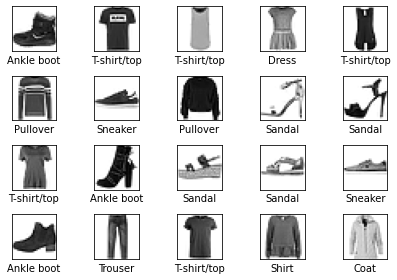

In [7]:
# Define the class names for the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display 20 images along with their labels
plt.figure(figsize=(6, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

## Chargement du jeu de données et mise en données

In [8]:
type='float32'                                                 
tf.keras.backend.set_floatx(type)                                                                                      
# Preparation du jeu de données (normalisation etc.)                  
x_train, y_train, x_test, y_test = FASHION_MNIST_flatten(type)


## Choix de l'architecture

In [12]:
# 'FC' pour 'Fully Connected'
name_model="FC" 
# 784 neurones dans la première couche, 400 dans la suivante et 10 (taille de la sortie 'class_names')
nbNeurons=[784,400,10]  
# fonctions d'activations 'tanh' sur les couches latentes, 'softmax' sur la dernière (celle de la sortie)
activations=['tanh','softmax']                          
# fonction de coût 'norme L2'
loss = losses.MeanSquaredError()
# métrique de référence: précision en termes de classification
metrics = ["categorical_accuracy"]
# Type d'initialisation aléatoire des poids
name_init="Xavier"        
# paramètres 'dummy' pour cette étude
params_init=[-1,1]      
                           

## Apprentissage avec l'optimiseur Adam

In [13]:
#paramètres d'arrêt (communs à tous les optimiseurs)               
eps=10**(-4); max_epochs=1000      
#paramètres d'entrainement communs à tous les optimiseurs                                                        
lr=0.1

# paramètres de LCEGD
seuil=0.01                                                                            
f1=30; f2=10000; lambd=0.5; rho=0.9; eps_egd=0.01  

# paramètres d'adam (si adam est utilisé)
beta_1=0.9; beta_2=0.999; epsilon=1e-07                                               
amsgrad=False     

In [14]:
# Qqs paramètres secondaires
tirageMin=0; nbTirages=1;

# si =1, tous les exemples ont les mêmes poids
sample_weight=1

# Algorithme adaptatif de la thèse de Bilel Bensaid
algo="Adam"     
# Lancement de l'apprentissage
studies = tirages.tirages(tirageMin,nbTirages,name_model,nbNeurons,activations,loss,name_init,params_init,metrics,
x_train,y_train,algo,eps,max_epochs,lr,seuil,f1,f2,rho,eps_egd,lambd,beta_1,beta_2,epsilon,amsgrad,sample_weight,
"simple",x_test,y_test)
print(studies)


Training loss (for one batch) at step 2: 0.17777067
grad:  tf.Tensor(0.02459045, shape=(), dtype=float32)
Training loss (for one batch) at step 4: 0.17737305
grad:  tf.Tensor(0.05054385, shape=(), dtype=float32)
Training loss (for one batch) at step 6: 0.16268893
grad:  tf.Tensor(0.019382572, shape=(), dtype=float32)
Training loss (for one batch) at step 8: 0.16062818
grad:  tf.Tensor(0.0008952355, shape=(), dtype=float32)
Training loss (for one batch) at step 10: 0.16060016
grad:  tf.Tensor(0.0009733338, shape=(), dtype=float32)
Training loss (for one batch) at step 12: 0.16080466
grad:  tf.Tensor(0.0017547461, shape=(), dtype=float32)
Training loss (for one batch) at step 14: 0.16029453
grad:  tf.Tensor(0.0010754574, shape=(), dtype=float32)
Training loss (for one batch) at step 16: 0.15932165
grad:  tf.Tensor(0.02016046, shape=(), dtype=float32)
Training loss (for one batch) at step 18: 0.16081914
grad:  tf.Tensor(0.00031368303, shape=(), dtype=float32)
Training loss (for one batch)

KeyboardInterrupt: 

## Apprentissage avec l'optimiseur de la thèse de Bilel Bensaid

In [15]:
# Qqs paramètres secondaires
tirageMin=0; nbTirages=1;

# si =1, tous les exemples ont les mêmes poids
sample_weight=1

# Algorithme adaptatif de la thèse de Bilel Bensaid
algo="LC_EGD2"     
# Lancement de l'apprentissage
studies = tirages.tirages(tirageMin,nbTirages,name_model,nbNeurons,activations,loss,name_init,params_init,metrics,
x_train,y_train,algo,eps,max_epochs,lr,seuil,f1,f2,rho,eps_egd,lambd,beta_1,beta_2,epsilon,amsgrad,sample_weight,
"simple",x_test,y_test)
print(studies)


cost_init:  tf.Tensor(0.119567335, shape=(), dtype=float32)

Start of epoch 2
Training loss (for one batch) at epoch 2: 0.10738213
grad:  tf.Tensor(0.22531131, shape=(), dtype=float32)
lr:  2028.6020648339486
dim:  tf.Tensor(-0.005992286, shape=(), dtype=float32)
top:  tf.Tensor(-51.49118, shape=(), dtype=float32)

Start of epoch 4
Training loss (for one batch) at epoch 4: 0.09965721
grad:  tf.Tensor(0.2419915, shape=(), dtype=float32)
lr:  5456.955757827525
dim:  tf.Tensor(-0.0052750185, shape=(), dtype=float32)
top:  tf.Tensor(-159.77936, shape=(), dtype=float32)

Start of epoch 6
Training loss (for one batch) at epoch 6: 0.09513728
grad:  tf.Tensor(0.13496618, shape=(), dtype=float32)
lr:  1145.1518032108636
dim:  tf.Tensor(-0.0016312152, shape=(), dtype=float32)
top:  tf.Tensor(-10.429969, shape=(), dtype=float32)

Start of epoch 8
Training loss (for one batch) at epoch 8: 0.09225729
grad:  tf.Tensor(0.10907527, shape=(), dtype=float32)
lr:  860.3915972377324
dim:  tf.Tensor(-0.001

KeyboardInterrupt: 